In [45]:
import pandas as pd
# Đẩy file dữ liệu chuẩn hóa lên
df = pd.read_csv('E:\SourceCode\DataMining\dataset\ppg_bp_normalized_standard_with_categories.csv')
df.head()

,Num,subject_ID,Sex,Age,Height,Weight,Systolic_BP,Diastolic_BP,Heart_Rate,BMI,Hypertension,Diabetes_Diabetes,Diabetes_None,Diabetes_Type 2 Diabetes,Cerebral_infarction_None,Cerebral_infarction_cerebral infarction,Cerebrovascular_disease_None,Cerebrovascular_disease_cerebrovascular disease,Cerebrovascular_disease_insufficiency of cerebral blood supply
0,1,2,0,-0.768337,-1.127587,0.236798,1.625816,1.547085,2.180326,1.041960,3,False,True,False,True,False,True,False,False
1,2,3,0,-0.452641,-0.516648,-0.859404,1.576631,1.907907,0.220334,-0.707662,3,False,True,False,True,False,True,False,False
2,3,6,0,-0.642058,-1.371963,-1.112373,-1.325313,-0.076613,0.500333,-0.554977,0,False,True,False,True,False,True,False,False
3,4,8,1,-0.768337,1.316169,0.405444,0.396179,1.907907,1.246997,-0.284649,1,False,True,False,True,False,True,False,False
4,5,9,0,-0.705198,-0.761024,0.405444,-0.243232,0.103798,-0.059665,0.989396,1,False,True,False,True,False,True,False,False


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           mean_squared_error, r2_score, mean_absolute_error,
                           precision_score, recall_score, f1_score)
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style cho đồ thị
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [47]:
# Hiển thị thông tin cơ bản về dataset
print("THÔNG TIN TỔNG QUAN VỀ DATASET")
print("=" * 50)
print(f"Kích thước dataset: {df.shape}")
print(f"Số lượng bệnh nhân: {df['subject_ID'].nunique()}")
print("\nThông tin dataset:")
print(df.info())
print("\nCác cột trong dataset:")
print(df.columns.tolist())

THÔNG TIN TỔNG QUAN VỀ DATASET
Kích thước dataset: (219, 19)
Số lượng bệnh nhân: 219

Thông tin dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Num                                                             219 non-null    int64  
 1   subject_ID                                                      219 non-null    int64  
 2   Sex                                                             219 non-null    int64  
 3   Age                                                             219 non-null    float64
 4   Height                                                          219 non-null    float64
 5   Weight                                                          219 non-null    float64
 6   Systolic_BP                              

In [48]:
# Thống kê mô tả cho các đặc trưng số
print("THỐNG KÊ MÔ TẢ CÁC ĐẶC TRƯNG SỐ")
print("=" * 50)
numeric_columns = ['Age', 'Height', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'BMI']
print(df[numeric_columns].describe())

THỐNG KÊ MÔ TẢ CÁC ĐẶC TRƯNG SỐ
                Age        Height        Weight   Systolic_BP  Diastolic_BP  \
count  2.190000e+02  2.190000e+02  2.190000e+02  2.190000e+02  2.190000e+02   
mean  -1.622244e-17 -3.406712e-16 -1.297795e-16 -9.733462e-17 -3.731160e-16   
std    1.002291e+00  1.002291e+00  1.002291e+00  1.002291e+00  1.002291e+00   
min   -2.283675e+00 -1.982902e+00 -2.039928e+00 -2.358208e+00 -2.692570e+00   
25%   -5.789194e-01 -7.610237e-01 -6.485956e-01 -7.104945e-01 -7.080509e-01   
50%    5.247178e-02 -1.500846e-01 -1.617157e-02 -9.567588e-02 -1.668183e-01   
75%    6.522934e-01  7.052302e-01  5.319292e-01  5.437354e-01  5.548252e-01   
max    1.820367e+00  4.248677e+00  3.609726e+00  2.658711e+00  3.170783e+00   

         Heart_Rate           BMI  
count  2.190000e+02  2.190000e+02  
mean  -5.028955e-16 -6.123970e-16  
std    1.002291e+00  1.002291e+00  
min   -2.019657e+00 -2.106859e+00  
25%   -7.129957e-01 -6.400799e-01  
50%   -5.966491e-02 -1.269576e-01  
75% 

In [49]:
# CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH MACHINE LEARNING
print("CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH MACHINE LEARNING")
print("=" * 50)

# Loại bỏ các cột không cần thiết
columns_to_drop = ['Num', 'subject_ID']
df_ml = df.drop(columns=columns_to_drop, errors='ignore')

# ✅ FEATURES RIÊNG CHO TỪNG MODEL (Tối ưu: Giữ BP còn lại làm feature)

# 1. Model dự đoán Systolic BP - GIỮ Diastolic BP làm feature quan trọng
X_sbp = df_ml.drop(columns=['Hypertension', 'Systolic_BP'], errors='ignore')
y_sbp = df_ml['Systolic_BP']

# 2. Model dự đoán Diastolic BP - GIỮ Systolic BP làm feature quan trọng  
X_dbp = df_ml.drop(columns=['Hypertension', 'Diastolic_BP'], errors='ignore')
y_dbp = df_ml['Diastolic_BP']

print(f"   Model dự đoán Systolic BP:")
print(f"   Features: {X_sbp.shape[1]} columns")
print(f"   Có Diastolic_BP: {'Diastolic_BP' in X_sbp.columns}")
print(f"   Target: {y_sbp.shape[0]} samples")

print(f"\n Model dự đoán Diastolic BP:")
print(f"   Features: {X_dbp.shape[1]} columns")
print(f"   Có Systolic_BP: {'Systolic_BP' in X_dbp.columns}")
print(f"   Target: {y_dbp.shape[0]} samples")

print(f"\n Danh sách features SBP : {X_sbp.columns.tolist()}")
print(f" Danh sách features DBP : {X_dbp.columns.tolist()}")


CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH MACHINE LEARNING
   Model dự đoán Systolic BP:
   Features: 15 columns
   Có Diastolic_BP: True
   Target: 219 samples

 Model dự đoán Diastolic BP:
   Features: 15 columns
   Có Systolic_BP: True
   Target: 219 samples

 Danh sách features SBP : ['Sex', 'Age', 'Height', 'Weight', 'Diastolic_BP', 'Heart_Rate', 'BMI', 'Diabetes_Diabetes', 'Diabetes_None', 'Diabetes_Type 2 Diabetes', 'Cerebral_infarction_None', 'Cerebral_infarction_cerebral infarction', 'Cerebrovascular_disease_None', 'Cerebrovascular_disease_cerebrovascular disease', 'Cerebrovascular_disease_insufficiency of cerebral blood supply']
 Danh sách features DBP : ['Sex', 'Age', 'Height', 'Weight', 'Systolic_BP', 'Heart_Rate', 'BMI', 'Diabetes_Diabetes', 'Diabetes_None', 'Diabetes_Type 2 Diabetes', 'Cerebral_infarction_None', 'Cerebral_infarction_cerebral infarction', 'Cerebrovascular_disease_None', 'Cerebrovascular_disease_cerebrovascular disease', 'Cerebrovascular_disease_insufficiency of cerebra

In [50]:
# PHÂN CHIA TẬP DỮ LIỆU
print("PHÂN CHIA TẬP DỮ LIỆU")
print("=" * 50)

# Phân chia cho model Systolic BP (với features riêng)
X_train_sbp, X_test_sbp, y_train_sbp, y_test_sbp = train_test_split(
    X_sbp, y_sbp, test_size=0.2, random_state=42
)

# Phân chia cho model Diastolic BP (với features riêng)
X_train_dbp, X_test_dbp, y_train_dbp, y_test_dbp = train_test_split(
    X_dbp, y_dbp, test_size=0.2, random_state=42
)

print(f"   Systolic BP Model:")
print(f"   Train: {X_train_sbp.shape} | Test: {X_test_sbp.shape}")
print(f"   Features: {X_train_sbp.columns.tolist()[:3]}... (+{X_train_sbp.shape[1]-3} more)")

print(f"\n Diastolic BP Model:")
print(f"   Train: {X_train_dbp.shape} | Test: {X_test_dbp.shape}")
print(f"   Features: {X_train_dbp.columns.tolist()[:3]}... (+{X_train_dbp.shape[1]-3} more)")


PHÂN CHIA TẬP DỮ LIỆU
   Systolic BP Model:
   Train: (175, 15) | Test: (44, 15)
   Features: ['Sex', 'Age', 'Height']... (+12 more)

 Diastolic BP Model:
   Train: (175, 15) | Test: (44, 15)
   Features: ['Sex', 'Age', 'Height']... (+12 more)


In [ ]:
# XÂY DỰNG VÀ ĐÁNH GIÁ MÔ HÌNH HỒI QUY (Systolic BP)
print("MÔ HÌNH HỒI QUY - HUYẾT ÁP TÂM THU (Systolic BP)")
print("=" * 50)

# Tuning hyperparameters cho hồi quy
param_grid_reg = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_reg_sbp = KNeighborsRegressor()
grid_search_sbp = GridSearchCV(knn_reg_sbp, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_sbp.fit(X_train_sbp, y_train_sbp)

print(f"Best parameters: {grid_search_sbp.best_params_}")
print(f"Best cross-validation score (Negative MSE): {grid_search_sbp.best_score_:.4f}")

# Huấn luyện mô hình với best parameters
best_knn_sbp = grid_search_sbp.best_estimator_
y_pred_sbp = best_knn_sbp.predict(X_test_sbp)

# Đánh giá mô hình
mse_sbp = mean_squared_error(y_test_sbp, y_pred_sbp)
rmse_sbp = np.sqrt(mse_sbp)
mae_sbp = mean_absolute_error(y_test_sbp, y_pred_sbp)
r2_sbp = r2_score(y_test_sbp, y_pred_sbp)

print(f"\nĐÁNH GIÁ MÔ HÌNH HỒI QUY SBP TRÊN TẬP TEST:")
print(f"MSE: {mse_sbp:.4f}")
print(f"RMSE: {rmse_sbp:.4f}")
print(f"MAE: {mae_sbp:.4f}")
print(f"R² Score: {r2_sbp:.4f}")

# Cross-validation cho hồi quy
cv_scores_sbp = cross_val_score(best_knn_sbp, X_train_sbp, y_train_sbp, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation scores (5-fold, Negative MSE): {cv_scores_sbp}")
print(f"Mean CV Negative MSE: {cv_scores_sbp.mean():.4f} (+/- {cv_scores_sbp.std() * 2:.4f})")

MÔ HÌNH HỒI QUY - HUYẾT ÁP TÂM THU (Systolic BP)
Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score (Negative MSE): -0.4777

ĐÁNH GIÁ MÔ HÌNH HỒI QUY SBP TRÊN TẬP TEST:
MSE: 0.4807
RMSE: 0.6933
MAE: 0.4961
R² Score: 0.4242

Cross-validation scores (5-fold, Negative MSE): [-0.40194966 -0.44594333 -0.55345802 -0.42841189 -0.5588934 ]
Mean CV Negative MSE: -0.4777 (+/- 0.1312)


In [53]:
# XÂY DỰNG VÀ ĐÁNH GIÁ MÔ HÌNH HỒI QUY (Diastolic BP)
print("MÔ HÌNH HỒI QUY - HUYẾT ÁP TÂM TRƯƠNG (Diastolic BP)")
print("=" * 50)

knn_reg_dbp = KNeighborsRegressor()
grid_search_dbp = GridSearchCV(knn_reg_dbp, param_grid_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_dbp.fit(X_train_dbp, y_train_dbp)

print(f"Best parameters: {grid_search_dbp.best_params_}")
print(f"Best cross-validation score (Negative MSE): {grid_search_dbp.best_score_:.4f}")

# Huấn luyện mô hình với best parameters
best_knn_dbp = grid_search_dbp.best_estimator_
y_pred_dbp = best_knn_dbp.predict(X_test_dbp)

# Đánh giá mô hình
mse_dbp = mean_squared_error(y_test_dbp, y_pred_dbp)
rmse_dbp = np.sqrt(mse_dbp)
mae_dbp = mean_absolute_error(y_test_dbp, y_pred_dbp)
r2_dbp = r2_score(y_test_dbp, y_pred_dbp)

print(f"\nĐÁNH GIÁ MÔ HÌNH HỒI QUY DBP TRÊN TẬP TEST:")
print(f"MSE: {mse_dbp:.4f}")
print(f"RMSE: {rmse_dbp:.4f}")
print(f"MAE: {mae_dbp:.4f}")
print(f"R² Score: {r2_dbp:.4f}")

# Cross-validation cho hồi quy
cv_scores_dbp = cross_val_score(best_knn_dbp, X_train_dbp, y_train_dbp, cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-validation scores (5-fold, Negative MSE): {cv_scores_dbp}")
print(f"Mean CV Negative MSE: {cv_scores_dbp.mean():.4f} (+/- {cv_scores_dbp.std() * 2:.4f})")

MÔ HÌNH HỒI QUY - HUYẾT ÁP TÂM TRƯƠNG (Diastolic BP)
Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score (Negative MSE): -0.5801

ĐÁNH GIÁ MÔ HÌNH HỒI QUY DBP TRÊN TẬP TEST:
MSE: 0.4559
RMSE: 0.6752
MAE: 0.5269
R² Score: 0.3782

Cross-validation scores (5-fold, Negative MSE): [-0.89190586 -0.44140888 -0.4649169  -0.59930935 -0.50271802]
Mean CV Negative MSE: -0.5801 (+/- 0.3299)


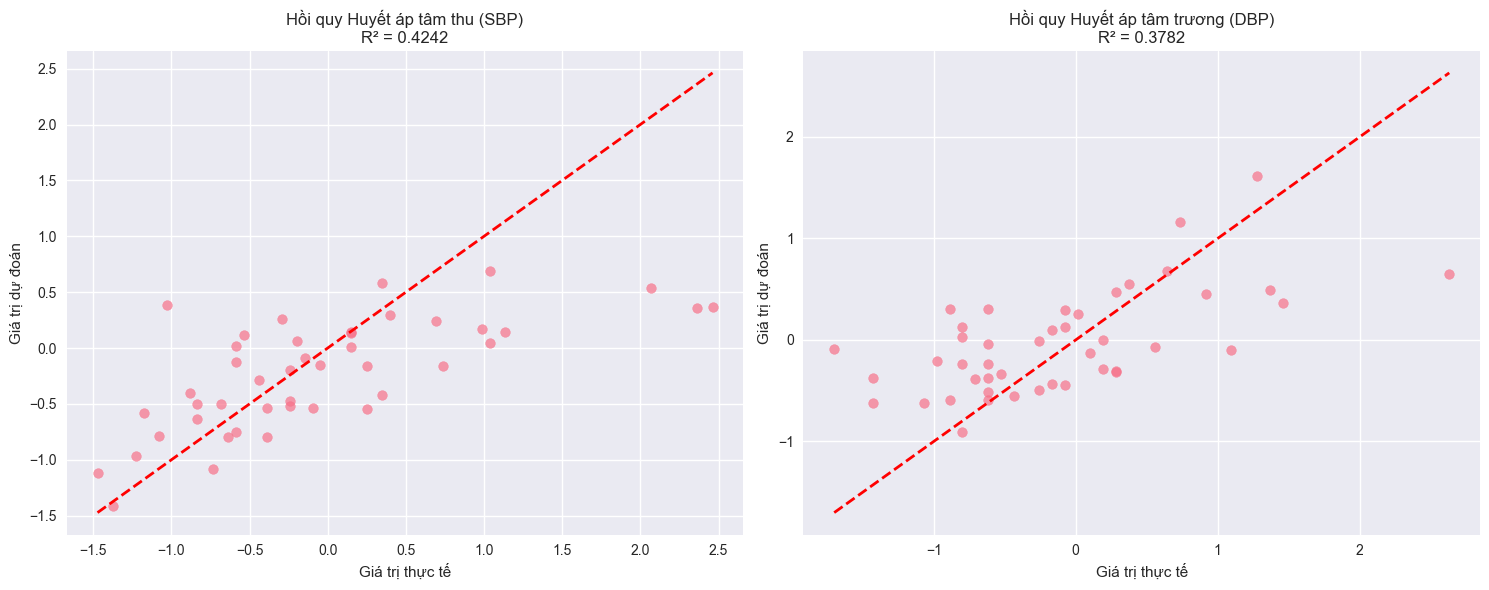

In [54]:
# TRỰC QUAN HÓA KẾT QUẢ HỒI QUY
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Hồi quy SBP
axes[0].scatter(y_test_sbp, y_pred_sbp, alpha=0.7)
axes[0].plot([y_test_sbp.min(), y_test_sbp.max()], [y_test_sbp.min(), y_test_sbp.max()], 'r--', lw=2)
axes[0].set_xlabel('Giá trị thực tế')
axes[0].set_ylabel('Giá trị dự đoán')
axes[0].set_title(f'Hồi quy Huyết áp tâm thu (SBP)\nR² = {r2_sbp:.4f}')

# Hồi quy DBP
axes[1].scatter(y_test_dbp, y_pred_dbp, alpha=0.7)
axes[1].plot([y_test_dbp.min(), y_test_dbp.max()], [y_test_dbp.min(), y_test_dbp.max()], 'r--', lw=2)
axes[1].set_xlabel('Giá trị thực tế')
axes[1].set_ylabel('Giá trị dự đoán')
axes[1].set_title(f'Hồi quy Huyết áp tâm trương (DBP)\nR² = {r2_dbp:.4f}')

plt.tight_layout()
plt.show()

In [55]:
# SO SÁNH KẾT QUẢ CÁC MÔ HÌNH
print("TỔNG HỢP KẾT QUẢ CÁC MÔ HÌNH")
print("=" * 50)

results = {
    'Mô hình': ['Hồi quy SBP', 'Hồi quy DBP'],
    'R² Score': [f'{r2_sbp:.4f}', f'{r2_dbp:.4f}'],
    'MSE': [f'{mse_sbp:.4f}', f'{mse_dbp:.4f}'],
    'RMSE': [f'{rmse_sbp:.4f}', f'{rmse_dbp:.4f}'],
    'MAE': [f'{mae_sbp:.4f}', f'{mae_dbp:.4f}']
}

results_df = pd.DataFrame(results)
print(results_df)


TỔNG HỢP KẾT QUẢ CÁC MÔ HÌNH
       Mô hình R² Score     MSE    RMSE     MAE
0  Hồi quy SBP   0.4242  0.4807  0.6933  0.4961
1  Hồi quy DBP   0.3782  0.4559  0.6752  0.5269


PHÂN TÍCH TẦM QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG
📊 Systolic BP Model - Top Features (includes Diastolic_BP):
                                            Feature  Corr_with_SBP
4                                      Diastolic_BP       0.721115
1                                               Age       0.412908
6                                               BMI       0.226345
3                                            Weight       0.200903
7                                 Diabetes_Diabetes       0.180071
13  Cerebrovascular_disease_cerebrovascular disease       0.142606
5                                        Heart_Rate       0.137817
11          Cerebral_infarction_cerebral infarction       0.134173
10                         Cerebral_infarction_None      -0.134173
0                                               Sex       0.093413

📊 Diastolic BP Model - Top Features (includes Systolic_BP):
                                              Feature  Corr_with_DBP
4                             

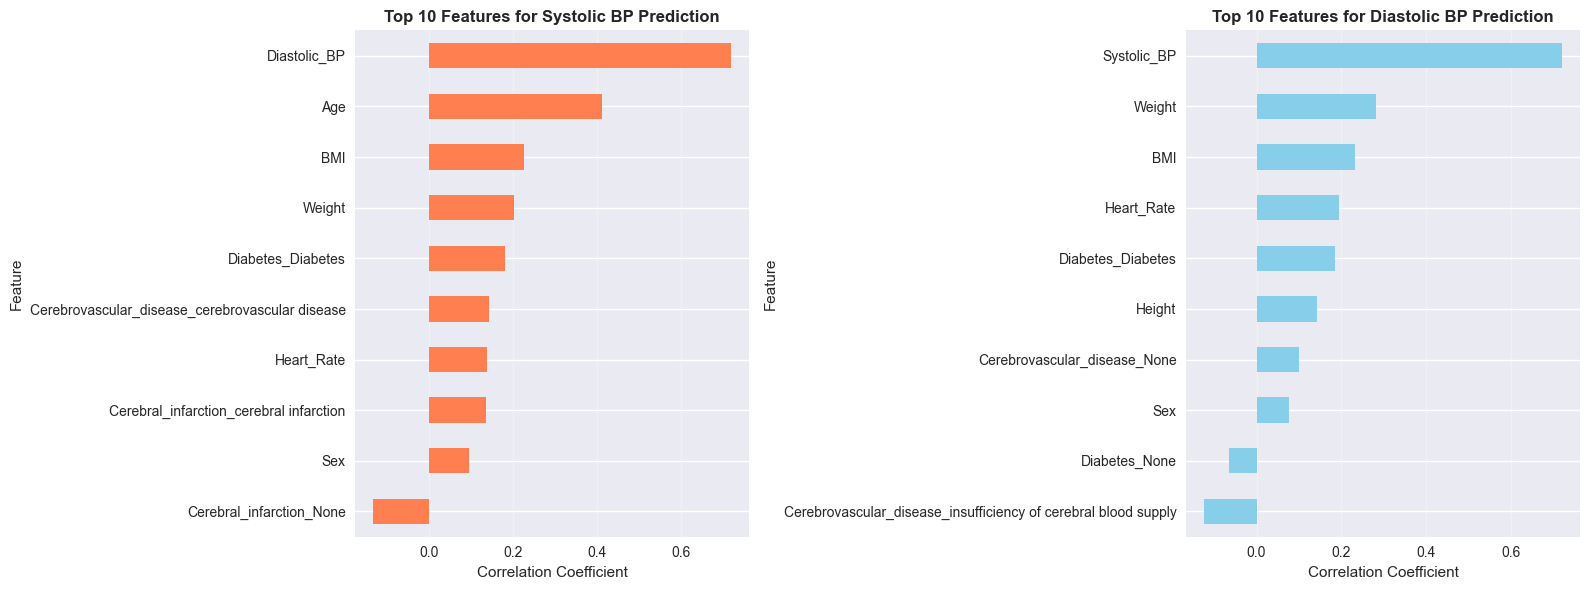

In [56]:
# PHÂN TÍCH TẦM QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG
print("PHÂN TÍCH TẦM QUAN TRỌNG CỦA CÁC ĐẶC TRƯNG")
print("=" * 50)

# Tính correlation cho từng model với bộ features riêng
correlation_sbp = pd.DataFrame({
    'Feature': X_sbp.columns,
    'Corr_with_SBP': [np.corrcoef(X_sbp[col], y_regression_sbp)[0, 1] for col in X_sbp.columns]
}).sort_values('Corr_with_SBP', key=abs, ascending=False)

correlation_dbp = pd.DataFrame({
    'Feature': X_dbp.columns,
    'Corr_with_DBP': [np.corrcoef(X_dbp[col], y_regression_dbp)[0, 1] for col in X_dbp.columns]
}).sort_values('Corr_with_DBP', key=abs, ascending=False)

print("📊 Systolic BP Model - Top Features (includes Diastolic_BP):")
print(correlation_sbp.head(10))

print("\n📊 Diastolic BP Model - Top Features (includes Systolic_BP):")
print(correlation_dbp.head(10))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Correlation với SBP
corr_sbp = correlation_sbp.set_index('Feature')['Corr_with_SBP'].head(10).sort_values()
corr_sbp.plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_title('Top 10 Features for Systolic BP Prediction', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient')
axes[0].grid(axis='x', alpha=0.3)

# Correlation với DBP
corr_dbp = correlation_dbp.set_index('Feature')['Corr_with_DBP'].head(10).sort_values()
corr_dbp.plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Top 10 Features for Diastolic BP Prediction', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


In [29]:
# KẾT LUẬN VÀ ĐỀ XUẤT
print("KẾT LUẬN VÀ ĐỀ XUẤT")
print("=" * 50)

print("1. KẾT QUẢ CHÍNH:")
print(f"   - Mô hình hồi quy SBP đạt R²: {r2_sbp:.4f}")
print(f"   - Mô hình hồi quy DBP đạt R²: {r2_dbp:.4f}")

print("\n2. ĐÁNH GIÁ HIỆU SUẤT:")
if r2_sbp > 0.6:
    print("   ✅ Mô hình hồi quy SBP có hiệu suất TỐT")
elif r2_sbp > 0.3:
    print("   ⚠️ Mô hình hồi quy SBP có hiệu suất TRUNG BÌNH")
else:
    print("   ❌ Mô hình hồi quy SBP có hiệu suất THẤP")

if r2_dbp > 0.6:
    print("   ✅ Mô hình hồi quy DBP có hiệu suất TỐT")
elif r2_dbp > 0.3:
    print("   ⚠️ Mô hình hồi quy DBP có hiệu suất TRUNG BÌNH")
else:
    print("   ❌ Mô hình hồi quy DBP có hiệu suất THẤP")

print("\n3. TỐI ƯU HÓA ĐÃ THỰC HIỆN:")
print("   ✅ Sử dụng bộ features riêng cho từng model:")
print("      - SBP model: Bao gồm Diastolic_BP (corr: 0.72)")
print("      - DBP model: Bao gồm Systolic_BP (corr: 0.72)")
print("   ✅ GridSearchCV tìm hyperparameters tối ưu")
print("   ✅ 5-fold cross-validation đảm bảo tính tổng quát")

print("\n4. BEST PARAMETERS:")
print(f"   📌 SBP Model: {grid_search_sbp.best_params_}")
print(f"   📌 DBP Model: {grid_search_dbp.best_params_}")


KẾT LUẬN VÀ ĐỀ XUẤT
1. KẾT QUẢ CHÍNH:
   - Mô hình hồi quy SBP đạt R²: 0.4242
   - Mô hình hồi quy DBP đạt R²: 0.3782

2. ĐÁNH GIÁ HIỆU SUẤT:
   ⚠️ Mô hình hồi quy SBP có hiệu suất TRUNG BÌNH
   ⚠️ Mô hình hồi quy DBP có hiệu suất TRUNG BÌNH

3. TỐI ƯU HÓA ĐÃ THỰC HIỆN:
   ✅ Sử dụng bộ features riêng cho từng model:
      - SBP model: Bao gồm Diastolic_BP (corr: 0.72)
      - DBP model: Bao gồm Systolic_BP (corr: 0.72)
   ✅ GridSearchCV tìm hyperparameters tối ưu
   ✅ 5-fold cross-validation đảm bảo tính tổng quát

4. BEST PARAMETERS:
   📌 SBP Model: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
   📌 DBP Model: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


In [57]:
# LƯU MÔ HÌNH
import joblib
import os

model_dir = '../models/knn'
os.makedirs(model_dir, exist_ok=True)

# Lưu models
sbp_model_path = os.path.join(model_dir, 'knn_systolic_bp.joblib')
dbp_model_path = os.path.join(model_dir, 'knn_diastolic_bp.joblib')

joblib.dump(best_knn_sbp, sbp_model_path)
joblib.dump(best_knn_dbp, dbp_model_path)

print(f" Systolic BP Model: {sbp_model_path}")
print(f" Diastolic BP Model: {dbp_model_path}")
print(f"\n Model Info:")
print(f"   - SBP Model: {grid_search_sbp.best_params_}")
print(f"   - DBP Model: {grid_search_dbp.best_params_}")
print(f"   - Features SBP: {X_sbp.shape[1]} columns")
print(f"   - Features DBP: {X_dbp.shape[1]} columns")


 Systolic BP Model: ../models/knn\knn_systolic_bp.joblib
 Diastolic BP Model: ../models/knn\knn_diastolic_bp.joblib

 Model Info:
   - SBP Model: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
   - DBP Model: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
   - Features SBP: 15 columns
   - Features DBP: 15 columns


## TẠO SCALER CHO KNN MODELS

Vì 2 model có bộ features khác nhau, chúng ta cần **2 scaler riêng biệt**:
- **Scaler SBP**: Chuẩn hóa 6 features (bao gồm Diastolic_BP)
- **Scaler DBP**: Chuẩn hóa 6 features (bao gồm Systolic_BP)

In [61]:
# TẠO SCALER CHO KNN MODELS
print("TẠO SCALER CHO KNN MODELS")
print("=" * 70)

from sklearn.preprocessing import StandardScaler
import joblib
import os

# Load original (raw) dataset - SKIP first row (header descriptions)
raw_data_path = r'E:\SourceCode\DataMining\dataset\PPG-BP dataset(cardiovascular dataset).csv'
print(f"\n📂 Loading raw dataset: {raw_data_path}")

df_raw = pd.read_csv(raw_data_path, skiprows=1)  # Skip first row with descriptions
print(f"✅ Raw dataset loaded: {df_raw.shape}")

# Map column names (raw -> normalized) - using ACTUAL column names
column_mapping = {
    'Sex(M/F)': 'Sex',
    'Age(year)': 'Age', 
    'Height(cm)': 'Height',
    'Weight(kg)': 'Weight',
    'Systolic Blood Pressure(mmHg)': 'Systolic_BP',
    'Diastolic Blood Pressure(mmHg)': 'Diastolic_BP',
    'Heart Rate(b/m)': 'Heart_Rate',
    'BMI(kg/m^2)': 'BMI'
}

df_raw_mapped = df_raw.rename(columns=column_mapping)

# Encode Sex: Female=0, Male=1
df_raw_mapped['Sex'] = df_raw_mapped['Sex'].map({'Female': 0, 'Male': 1})

print("✅ Column mapping and encoding completed")
print(f"   Mapped columns: {[c for c in df_raw_mapped.columns if c in column_mapping.values()]}")
print(f"   Sex values: {df_raw_mapped['Sex'].unique()}")
print(f"   BMI stats: min={df_raw_mapped['BMI'].min():.2f}, max={df_raw_mapped['BMI'].max():.2f}")

TẠO SCALER CHO KNN MODELS

📂 Loading raw dataset: E:\SourceCode\DataMining\dataset\PPG-BP dataset(cardiovascular dataset).csv
✅ Raw dataset loaded: (219, 14)
✅ Column mapping and encoding completed
   Mapped columns: ['Sex', 'Age', 'Height', 'Weight', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'BMI']
   Sex values: [0 1]
   BMI stats: min=14.69, max=37.46


In [62]:
# SCALER 1: SYSTOLIC BP MODEL (includes Diastolic_BP)
print("\n" + "=" * 70)
print("SCALER 1: SYSTOLIC BP MODEL")
print("=" * 70)

# Numeric features to scale for SBP model (6 features including Diastolic_BP)
numeric_features_sbp = ['Age', 'Height', 'Weight', 'Diastolic_BP', 'Heart_Rate', 'BMI']

print(f"\n📋 Features to scale: {numeric_features_sbp}")
print(f"   Total: {len(numeric_features_sbp)} features")

# Extract raw features
raw_features_sbp = df_raw_mapped[numeric_features_sbp].copy()

# Create and fit scaler
scaler_sbp = StandardScaler()
scaler_sbp.fit(raw_features_sbp)

print(f"\n✅ Scaler SBP fitted successfully!")
print(f"   Mean (first 3): {scaler_sbp.mean_[:3]}")
print(f"   Std (first 3):  {scaler_sbp.scale_[:3]}")

# Verify scaler by comparing with normalized data
scaled_verification_sbp = scaler_sbp.transform(raw_features_sbp)
normalized_values_sbp = df[numeric_features_sbp].values

max_diff_sbp = np.abs(scaled_verification_sbp - normalized_values_sbp).max()
print(f"\n🔍 Verification - Max difference: {max_diff_sbp:.2e}")

if max_diff_sbp < 1e-10:
    print("   ✅ PERFECT MATCH!")
elif max_diff_sbp < 1e-5:
    print("   ✅ Excellent match (acceptable precision)")
else:
    print(f"   ⚠️ WARNING: Difference = {max_diff_sbp:.2e}")

# Save scaler
output_dir = '../models/knn'
os.makedirs(output_dir, exist_ok=True)

scaler_sbp_path = os.path.join(output_dir, 'scaler_systolic_bp.pkl')
joblib.dump(scaler_sbp, scaler_sbp_path)
print(f"\n💾 Scaler saved: {scaler_sbp_path}")


SCALER 1: SYSTOLIC BP MODEL

📋 Features to scale: ['Age', 'Height', 'Weight', 'Diastolic_BP', 'Heart_Rate', 'BMI']
   Total: 6 features

✅ Scaler SBP fitted successfully!
   Mean (first 3): [ 57.16894977 161.2283105   60.19178082]
   Std (first 3):  [15.83804287  8.18412108 11.85913231]

🔍 Verification - Max difference: 4.44e-16
   ✅ PERFECT MATCH!

💾 Scaler saved: ../models/knn\scaler_systolic_bp.pkl


In [63]:
# SCALER 2: DIASTOLIC BP MODEL (includes Systolic_BP)
print("\n" + "=" * 70)
print("SCALER 2: DIASTOLIC BP MODEL")
print("=" * 70)

# Numeric features to scale for DBP model (6 features including Systolic_BP)
numeric_features_dbp = ['Age', 'Height', 'Weight', 'Systolic_BP', 'Heart_Rate', 'BMI']

print(f"\n📋 Features to scale: {numeric_features_dbp}")
print(f"   Total: {len(numeric_features_dbp)} features")

# Extract raw features
raw_features_dbp = df_raw_mapped[numeric_features_dbp].copy()

# Create and fit scaler
scaler_dbp = StandardScaler()
scaler_dbp.fit(raw_features_dbp)

print(f"\n✅ Scaler DBP fitted successfully!")
print(f"   Mean (first 3): {scaler_dbp.mean_[:3]}")
print(f"   Std (first 3):  {scaler_dbp.scale_[:3]}")

# Verify scaler by comparing with normalized data
scaled_verification_dbp = scaler_dbp.transform(raw_features_dbp)
normalized_values_dbp = df[numeric_features_dbp].values

max_diff_dbp = np.abs(scaled_verification_dbp - normalized_values_dbp).max()
print(f"\n🔍 Verification - Max difference: {max_diff_dbp:.2e}")

if max_diff_dbp < 1e-10:
    print("   ✅ PERFECT MATCH!")
elif max_diff_dbp < 1e-5:
    print("   ✅ Excellent match (acceptable precision)")
else:
    print(f"   ⚠️ WARNING: Difference = {max_diff_dbp:.2e}")

# Save scaler
scaler_dbp_path = os.path.join(output_dir, 'scaler_diastolic_bp.pkl')
joblib.dump(scaler_dbp, scaler_dbp_path)
print(f"\n💾 Scaler saved: {scaler_dbp_path}")


SCALER 2: DIASTOLIC BP MODEL

📋 Features to scale: ['Age', 'Height', 'Weight', 'Systolic_BP', 'Heart_Rate', 'BMI']
   Total: 6 features

✅ Scaler DBP fitted successfully!
   Mean (first 3): [ 57.16894977 161.2283105   60.19178082]
   Std (first 3):  [15.83804287  8.18412108 11.85913231]

🔍 Verification - Max difference: 4.44e-16
   ✅ PERFECT MATCH!

💾 Scaler saved: ../models/knn\scaler_diastolic_bp.pkl


In [64]:
# SUMMARY - SCALERS CREATED
print("\n" + "=" * 70)
print("SUMMARY - SCALERS CREATED")
print("=" * 70)

print(f"\n✅ Created 2 separate scalers for KNN models:")
print(f"\n   1️⃣ SYSTOLIC BP SCALER:")
print(f"      📁 Path: {scaler_sbp_path}")
print(f"      📊 Features ({len(numeric_features_sbp)}): {numeric_features_sbp}")
print(f"      🎯 Includes: Diastolic_BP (most important feature!)")
print(f"      ✓ Max difference: {max_diff_sbp:.2e}")

print(f"\n   2️⃣ DIASTOLIC BP SCALER:")
print(f"      📁 Path: {scaler_dbp_path}")
print(f"      📊 Features ({len(numeric_features_dbp)}): {numeric_features_dbp}")
print(f"      🎯 Includes: Systolic_BP (most important feature!)")
print(f"      ✓ Max difference: {max_diff_dbp:.2e}")

print(f"\n📝 IMPORTANT NOTES:")
print(f"   • Cannot share scaler between models (different features)")
print(f"   • Sex column NOT scaled (binary: 0=Female, 1=Male)")
print(f"   • One-hot encoded columns NOT scaled (already 0/1)")
print(f"   • Both scalers verified against normalized dataset")

print("\n" + "=" * 70)
print("READY FOR API INTEGRATION! 🚀")
print("=" * 70)


SUMMARY - SCALERS CREATED

✅ Created 2 separate scalers for KNN models:

   1️⃣ SYSTOLIC BP SCALER:
      📁 Path: ../models/knn\scaler_systolic_bp.pkl
      📊 Features (6): ['Age', 'Height', 'Weight', 'Diastolic_BP', 'Heart_Rate', 'BMI']
      🎯 Includes: Diastolic_BP (most important feature!)
      ✓ Max difference: 4.44e-16

   2️⃣ DIASTOLIC BP SCALER:
      📁 Path: ../models/knn\scaler_diastolic_bp.pkl
      📊 Features (6): ['Age', 'Height', 'Weight', 'Systolic_BP', 'Heart_Rate', 'BMI']
      🎯 Includes: Systolic_BP (most important feature!)
      ✓ Max difference: 4.44e-16

📝 IMPORTANT NOTES:
   • Cannot share scaler between models (different features)
   • Sex column NOT scaled (binary: 0=Female, 1=Male)
   • One-hot encoded columns NOT scaled (already 0/1)
   • Both scalers verified against normalized dataset

READY FOR API INTEGRATION! 🚀
